In [1]:
from keras import Input
from keras.layers import Conv2D, AveragePooling2D, concatenate
from keras.models import Model
from plot_util import show_model

Using TensorFlow backend.


In [2]:
x = Input(shape=(299, 299, 3))

branch_a = Conv2D(128, 1, padding='same', activation='relu', strides=2)(x)

branch_b = Conv2D(128, 1, padding='same', activation='relu')(x)
branch_b = Conv2D(128, 3, padding='same', activation='relu', strides=2)(branch_b)

branch_c = AveragePooling2D(3, padding='same', strides=2)(x)
branch_c = Conv2D(128, 3, padding='same', activation='relu')(branch_c)

branch_d = Conv2D(128, 1, padding='same', activation='relu')(x)
branch_d = Conv2D(128, 3, padding='same', activation='relu')(branch_d)
branch_d = Conv2D(128, 3, padding='same', activation='relu', strides=2)(branch_d)

output = concatenate([branch_a, branch_b, branch_c, branch_d], axis=-1)

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
model = Model(x, output)

In [4]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 299, 299, 128 512         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 299, 299, 128 512         input_1[0][0]                    
__________________________________________________________________________________________________
average_pooling2d_1 (AveragePoo (None, 150, 150, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_6 (

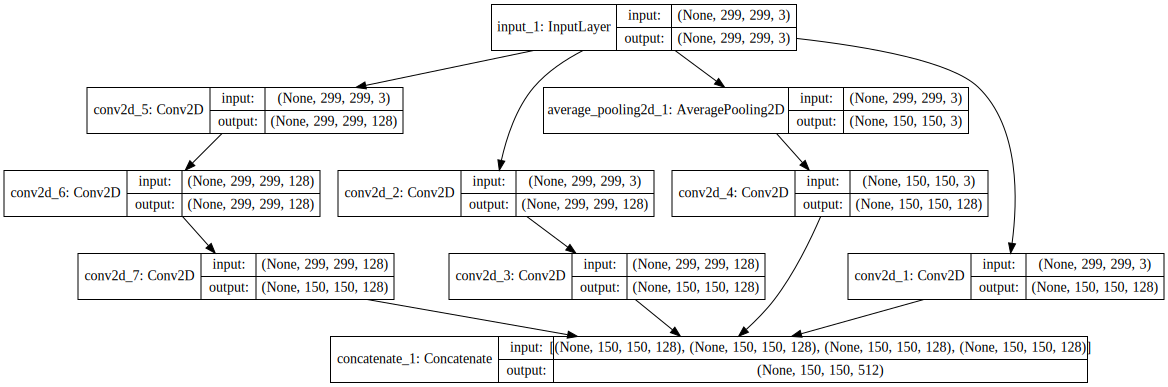

In [5]:
show_model(model)